# 4. Analysis of e-waste generation in the world

This notebook contains the analysis of the data regarding the e-weaste generated in the European Union from 1980 to 2021. A new data frame is created from the clean data. 

In [1]:
import pandas as pd
import numpy as np
import pymysql
import getpass
import matplotlib
import matplotlib.pyplot as plt
import mysql_connection as mc
%matplotlib inline

In [2]:
conn = mc.connect()

Please insert your password: ········


### 1. Analysis of e-waste generation in the world

In [3]:
# Total e-waste generated per country (in kt) from 2000 to 2020

ewaste_world_query = """
SELECT *
FROM 7_ewaste_world_generation ewg
    INNER JOIN 6_countries co
    ON ewg.country = co.country
WHERE ewg.year >= 2000
    AND ewg.year <= 2020
"""

In [4]:
ewaste_world = pd.read_sql(ewaste_world_query, conn)

In [5]:
ewaste_world.head()

,country,year,ewaste_kpi,ewaste_kt,ewaste_t,country,income_group,country_name,region
0,AFG,2000,0.101444,2.196450,2196.449617,AFG,Low income,Afghanistan,Other
1,AGO,2000,0.412558,7.034116,7034.116261,AGO,Lower middle income,Angola,Other
2,ALB,2000,1.442311,4.455299,4455.298925,ALB,Upper middle income,Albania,Other
3,ARE,2000,5.989872,17.939667,17939.666840,ARE,High income,United Arab Emirates,Other
4,ARG,2000,3.307538,121.664472,121664.471900,ARG,Upper middle income,Argentina,Other


In [6]:
ewaste_world.isnull().sum()

country         0
year            0
ewaste_kpi      0
ewaste_kt       0
ewaste_t        0
country         0
income_group    0
country_name    0
region          0
dtype: int64

In [7]:
# Create a column of e-waste generated in million tonnes 

ewaste_world["ewaste_mt"] = ewaste_world["ewaste_kt"] / 1000

# Create a column with e-waste equivalent to Eiffel Towers

eiffel_tower = 10100
ewaste_world["ewaste_eff"] = ewaste_world["ewaste_mt"] * 1000000 / eiffel_tower

In [8]:
ewaste_world.head()

,country,year,ewaste_kpi,ewaste_kt,ewaste_t,country,income_group,country_name,region,ewaste_mt,ewaste_eff
0,AFG,2000,0.101444,2.196450,2196.449617,AFG,Low income,Afghanistan,Other,0.002196,0.217470
1,AGO,2000,0.412558,7.034116,7034.116261,AGO,Lower middle income,Angola,Other,0.007034,0.696447
2,ALB,2000,1.442311,4.455299,4455.298925,ALB,Upper middle income,Albania,Other,0.004455,0.441119
3,ARE,2000,5.989872,17.939667,17939.666840,ARE,High income,United Arab Emirates,Other,0.017940,1.776205
4,ARG,2000,3.307538,121.664472,121664.471900,ARG,Upper middle income,Argentina,Other,0.121664,12.045987


In [9]:
# Let's look at the e-waste generated in the world per year

year_mt = (ewaste_world.groupby("year").agg({"ewaste_mt": "sum", "ewaste_eff": "sum"}).reset_index())

In [10]:
year_mt

,year,ewaste_mt,ewaste_eff
0,2000,14.478966,1433.561014
1,2001,15.692614,1553.724153
2,2002,17.004986,1683.661957
3,2003,18.438242,1825.568540
4,2004,20.032124,1983.378607
5,2005,21.791557,2157.579906
6,2006,23.726275,2349.136113
7,2007,25.876543,2562.034008
8,2008,28.213713,2793.436926
9,2009,30.497120,3019.516857


In [11]:
# Let's look at the e-waste equivalent to Eiffel Towers generated in a single year

def e_waste_equiv_et(year):
    print("In " + str(year) + ", " + str(year_mt.loc[year_mt["year"] == year]["ewaste_mt"].iloc[0]) 
          + " tonnes of e-waste was generated. This is equivalent to " 
          + str(year_mt.loc[year_mt["year"] == year]["ewaste_eff"].iloc[0]) + " Eiffel Towers!")

In [12]:
e_waste_equiv_et(2000)
e_waste_equiv_et(2020)

In 2000, 14.478966239465997 tonnes of e-waste was generated. This is equivalent to 1433.5610138085142 Eiffel Towers!
In 2020, 50.77965394876402 tonnes of e-waste was generated. This is equivalent to 5027.688509778611 Eiffel Towers!


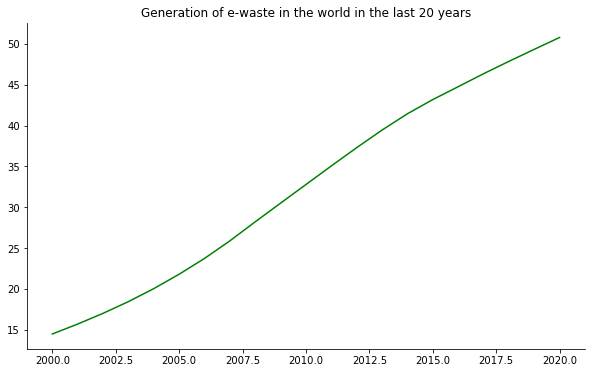

In [13]:
# Plot e-waste generation in the world in the last 20 years

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(year_mt["year"],
        year_mt["ewaste_mt"],
        color="g");
ax.set_title("Generation of e-waste in the world in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [14]:
# Let's look at the waste generated in the EU only

year_mt_eu = (ewaste_world
              .loc[ewaste_world["region"] == "Europe"]
              .groupby("year")
              .agg({"ewaste_mt": "sum", "ewaste_eff": "sum"})
              .reset_index())

In [15]:
year_mt_eu

,year,ewaste_mt,ewaste_eff
0,2000,5.502342,544.786336
1,2001,5.824692,576.702199
2,2002,6.144042,608.320996
3,2003,6.469710,640.565310
4,2004,6.821073,675.353793
5,2005,7.192635,712.142067
6,2006,7.568966,749.402580
7,2007,7.934087,785.553130
8,2008,8.279932,819.795247
9,2009,8.591570,850.650480


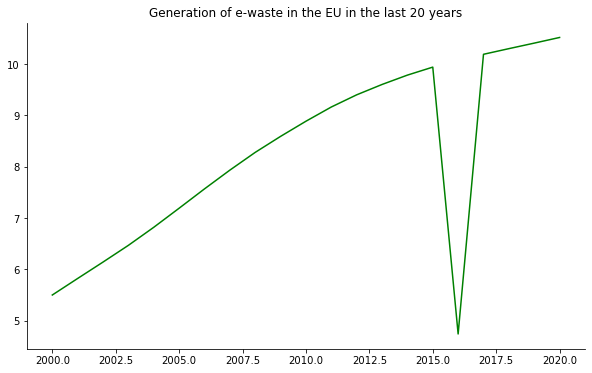

In [16]:
# Plot e-waste generation in the EU in the last 20 years

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(year_mt_eu["year"],
        year_mt_eu["ewaste_mt"],
        color="g");
ax.set_title("Generation of e-waste in the EU in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [17]:
# Let's look at the waste generated in the EU only

year_mt_other = (ewaste_world
              .loc[ewaste_world["region"] == "Other"]
              .groupby("year")
              .agg({"ewaste_mt": "sum", "ewaste_eff": "sum"})
              .reset_index())

In [18]:
year_mt_other

,year,ewaste_mt,ewaste_eff
0,2000,8.976624,888.774678
1,2001,9.867922,977.021954
2,2002,10.860944,1075.340961
3,2003,11.968533,1185.003230
4,2004,13.211051,1308.024815
5,2005,14.598922,1445.437840
6,2006,16.157309,1599.733533
7,2007,17.942457,1776.480878
8,2008,19.933781,1973.641679
9,2009,21.905550,2168.866377


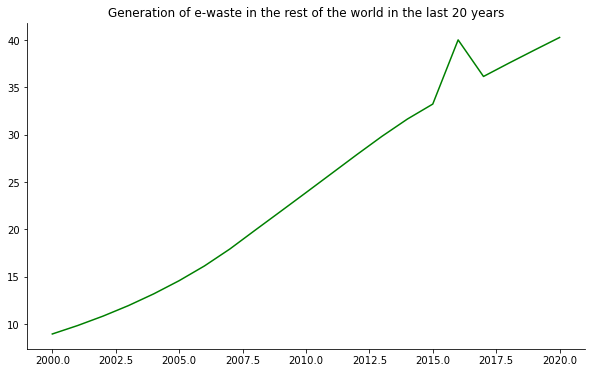

In [19]:
# Plot e-waste generation in the "Other" regions in the last 20 years

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(year_mt_other["year"],
        year_mt_other["ewaste_mt"],
        color="g");
ax.set_title("Generation of e-waste in the rest of the world in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [20]:
# It seems there is a mismatch in the trend for 2016, as an abrupt decrease is observed for the EU 
# and a sudden increase for the rest of the world

In [21]:
# Let's check the values for the EU countries

In [22]:
trends_eu = (ewaste_world
              .loc[ewaste_world["region"] == "Europe"])

In [23]:
trends_eu.head()

,country,year,ewaste_kpi,ewaste_kt,ewaste_t,country,income_group,country_name,region,ewaste_mt,ewaste_eff
8,AUT,2000,13.796465,110.537275,110537.274500,AUT,High income,Austria,Europe,0.110537,10.944285
11,BEL,2000,13.814950,141.451269,141451.268700,BEL,High income,Belgium,Europe,0.141451,14.005076
15,BGR,2000,3.915261,31.909376,31909.376320,BGR,Upper middle income,Bulgaria,Europe,0.031909,3.159344
39,CYP,2000,10.024972,6.917230,6917.230349,CYP,High income,Cyprus,Europe,0.006917,0.684874
40,CZE,2000,7.748758,79.641730,79641.729640,CZE,High income,Czech Republic,Europe,0.079642,7.885320


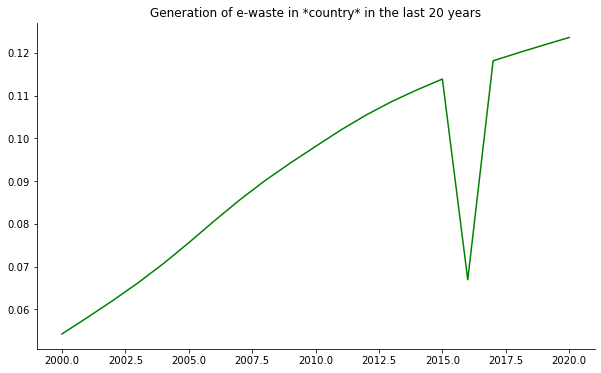

In [24]:
# Plot e-waste generation in the each EU country in the last 20 years
# Try different countries by changing the country name

country = trends_eu.loc[trends_eu["country_name"] == "Finland"]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(country["year"],
        country["ewaste_mt"],
        color="g");
ax.set_title("Generation of e-waste in *country* in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [25]:
# The abrupt decrease is observed for all the countries. 

In [26]:
# Let's check for other countries in the world

In [27]:
trends_other = (ewaste_world
                .loc[ewaste_world["region"] == "Other"])

In [28]:
trends_other.head()

,country,year,ewaste_kpi,ewaste_kt,ewaste_t,country,income_group,country_name,region,ewaste_mt,ewaste_eff
0,AFG,2000,0.101444,2.196450,2196.449617,AFG,Low income,Afghanistan,Other,0.002196,0.217470
1,AGO,2000,0.412558,7.034116,7034.116261,AGO,Lower middle income,Angola,Other,0.007034,0.696447
2,ALB,2000,1.442311,4.455299,4455.298925,ALB,Upper middle income,Albania,Other,0.004455,0.441119
3,ARE,2000,5.989872,17.939667,17939.666840,ARE,High income,United Arab Emirates,Other,0.017940,1.776205
4,ARG,2000,3.307538,121.664472,121664.471900,ARG,Upper middle income,Argentina,Other,0.121664,12.045987


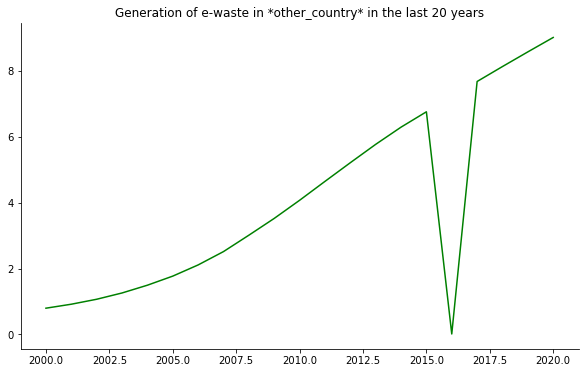

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

other_country = trends_other.loc[trends_other["country_name"] == "China"]

ax.plot(other_country["year"],
        other_country["ewaste_mt"],
        color="g");
ax.set_title("Generation of e-waste in *other_country* in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [30]:
# Each other country has mismatches

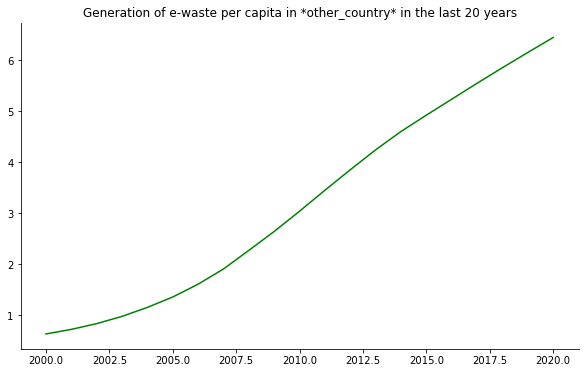

In [31]:
# Let's check amount of e-waste generated per capita

fig, ax = plt.subplots(figsize=(10,6))

other_country = trends_other.loc[trends_other["country_name"] == "China"]

ax.plot(other_country["year"],
        other_country["ewaste_kpi"],
        color="g");
ax.set_title("Generation of e-waste per capita in *other_country* in the last 20 years");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [32]:
ewaste_all_data = """
SELECT *
FROM 7_ewaste_world_generation ewg
    INNER JOIN 6_countries co
    ON ewg.country = co.country
    INNER JOIN 4_gdp_total_countries gdpc
    ON ewg.country = gdpc.country
    INNER JOIN 5_gdp_per_capita gdppc
    ON ewg.country = gdppc.country
WHERE ewg.year >= 2000
    AND ewg.year <= 2020
"""

In [33]:
ewaste_all = pd.read_sql(ewaste_all_data, conn)

In [34]:
ewaste_all

,country,year,ewaste_kpi,ewaste_kt,ewaste_t,country,income_group,country_name,region,country_name,country,year,gdp,country_name,country,year,gdp_pc
0,AFG,2000,0.101444,2.196450,2196.449617,AFG,Low income,Afghanistan,Other,Afghanistan,AFG,1960,5.377778e+08,Afghanistan,AFG,1960,59.77319384
1,AFG,2001,0.107795,2.363583,2363.583482,AFG,Low income,Afghanistan,Other,Afghanistan,AFG,1960,5.377778e+08,Afghanistan,AFG,1960,59.77319384
2,AFG,2002,0.115334,2.560754,2560.753553,AFG,Low income,Afghanistan,Other,Afghanistan,AFG,1960,5.377778e+08,Afghanistan,AFG,1960,59.77319384
3,AFG,2003,0.122107,2.822622,2822.622211,AFG,Low income,Afghanistan,Other,Afghanistan,AFG,1960,5.377778e+08,Afghanistan,AFG,1960,59.77319384
4,AFG,2004,0.131616,3.161278,3161.278039,AFG,Low income,Afghanistan,Other,Afghanistan,AFG,1960,5.377778e+08,Afghanistan,AFG,1960,59.77319384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820875,VNM,2016,1.519076,407.379120,407379.119800,VNM,Lower middle income,Vietnam,Other,Vietnam,VNM,2018,2.450000e+11,Vietnam,VNM,2019,
10820876,VNM,2017,1.587793,148.628576,148628.575700,VNM,Lower middle income,Vietnam,Other,Vietnam,VNM,2018,2.450000e+11,Vietnam,VNM,2019,
10820877,VNM,2018,1.659431,156.960614,156960.613900,VNM,Lower middle income,Vietnam,Other,Vietnam,VNM,2018,2.450000e+11,Vietnam,VNM,2019,
10820878,VNM,2019,1.734046,165.734886,165734.886100,VNM,Lower middle income,Vietnam,Other,Vietnam,VNM,2018,2.450000e+11,Vietnam,VNM,2019,


In [35]:
ewaste_all.isnull().sum()

country         0
year            0
ewaste_kpi      0
ewaste_kt       0
ewaste_t        0
country         0
income_group    0
country_name    0
region          0
country_name    0
country         0
year            0
gdp             0
country_name    0
country         0
year            0
gdp_pc          0
dtype: int64